In [1]:
import numpy as np
print(np.__version__)
from BorutaShap import BorutaShap
import pandas as pd

1.19.0


/home/juanxincai/anaconda3/envs/shap/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 读取player 的数据
player = pd.read_csv("../datafrom200/players.csv")
x_list = player.columns[7:-5]

X = player[x_list]
Y = player["value"]

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
rf = RandomForestRegressor(n_jobs=-1)

In [5]:
Feature_Selector = BorutaShap(model=rf, importance_measure='shap',
                              classification=False)

In [6]:
Feature_Selector.fit(X=X, y=Y, n_trials=100, sample=True,
            	     train_or_test = 'test', normalize=True,
		     verbose=True)

100%|██████████| 100/100 [5:39:31<00:00, 203.71s/it] 

22 attributes confirmed important: ['FK_Accuracy', 'Acceleration', 'Positioning', 'Strength', 'Interceptions', 'Stamina', 'Aggression', 'Dribbling', 'Ball_Control', 'Volleys', 'Standing_Tackle', 'Short_Passing', 'Heading_Accuracy', 'Reactions', 'Defensive_Awareness', 'Long_Passing', 'Vision', 'Crossing', 'Finishing', 'Sprint_Speed', 'Penalties', 'Sliding_Tackle']
6 attributes confirmed unimportant: ['Balance', 'Agility', 'Long_Shots', 'Curve', 'Shot_Power', 'Jumping']
1 tentative attributes remains: ['Composure']


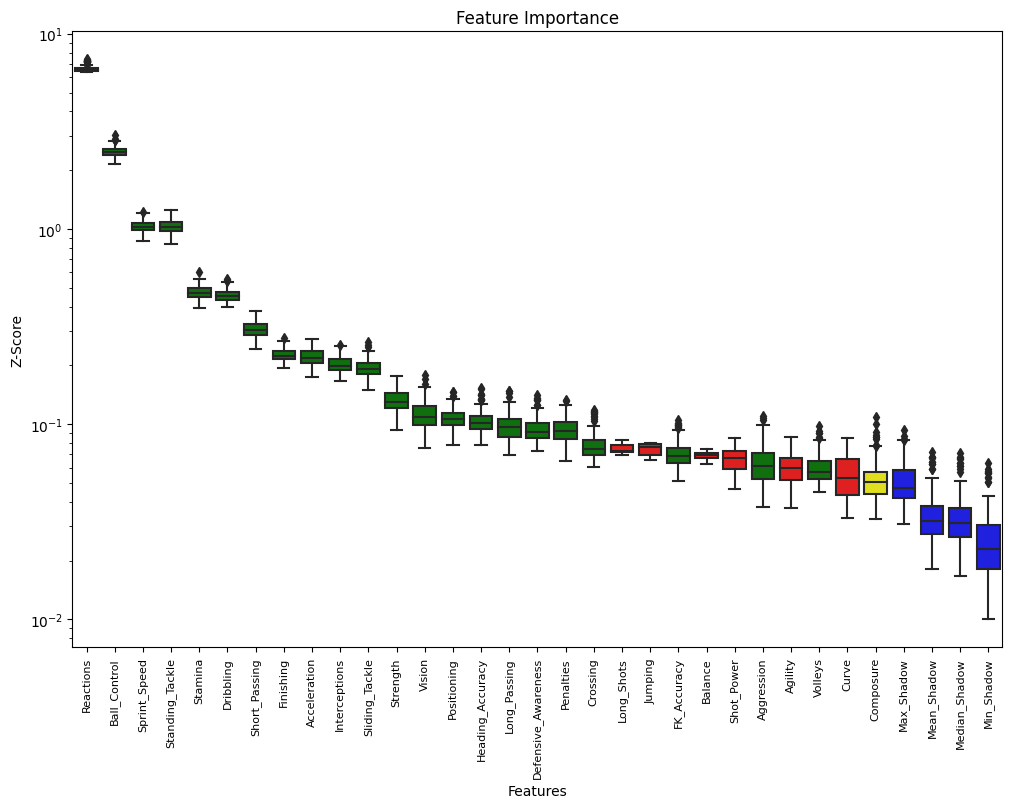

In [7]:
Feature_Selector.plot(which_features='all')